# **Aprendizaje no supervisado**
# UL10. Factor Analysis - Opcional - SOLUCIÓN

<img src="https://drive.google.com/uc?export=view&id=1UT8QmOplTfNn0iH3FTtAQhXCHzS0M6si" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Introducción al análisis factorial**</font>

En este notebook, aprenderá los conceptos básicos del análisis factorial y cómo implementarlo en Python.

El análisis factorial (FA) es un método de análisis de datos exploratorio que se utiliza para buscar factores subyacentes influyentes o variables latentes de un conjunto de variables observadas. Ayuda en la interpretación de datos al reducir el número de variables. Extrae la varianza máxima común de todas las variables y las coloca en una puntuación común.

El análisis factorial se utiliza ampliamente en investigación de mercado, publicidad, psicología, finanzas e investigación operativa. Los investigadores de mercado utilizan el análisis de factores para identificar a los clientes sensibles al precio, identificar las características de la marca que influyen en la elección del consumidor y ayudar a comprender los criterios de selección de canales para el canal de distribución.

En este tutorial, cubrirá los siguientes temas:

  1. Análisis factorial
  2. Tipos de análisis factorial
  3. Determinar el número de factores
  4. Análisis factorial vs. Análisis de componentes principales
  5. Análisis factorial en python
  6. Prueba de adecuación
  7. Interpretando los resultados
  8. Pros y contras del análisis factorial
  9. Conclusión

## Análisis factorial

El análisis factorial es un modelo estadístico lineal. Se utiliza para explicar la varianza entre la variable observada y condensar un conjunto de la variable observada en la variable no observada llamada factores. Las variables observadas se modelan como una combinación lineal de factores y términos de error (Fuente). El factor o variable latente se asocia con múltiples variables observadas, que tienen patrones comunes de respuestas. Cada factor explica una cantidad particular de varianza en las variables observadas. Ayuda en la interpretación de datos al reducir el número de variables.

$$ Y_i = \beta_{i0}+\beta_{i1}F_i + \beta_{i2}F_2 + (1)e_i$$

El análisis factorial es un método para investigar si una serie de variables de interés X1, X2, ……., Xl, están relacionadas linealmente con un número menor de factores no observables F1, F2, .. ……, Fk.

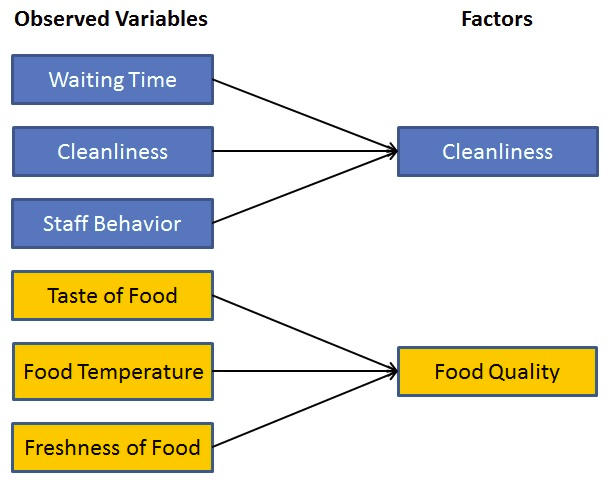



### Supuestos:

  - No hay valores atípicos en los datos.
  - El tamaño de la muestra debe ser mayor que el factor.
  - No debería haber una multicolinealidad perfecta.
  - No se requiere homocedasticidad entre las variables.

## Tipos de análisis factorial

  - Análisis factorial exploratorio: es el enfoque de análisis factorial más popular entre los investigadores sociales y de gestión. Su supuesto básico es que cualquier variable observada está directamente asociada con cualquier factor.
  - Análisis factorial confirmatorio (AFC): su supuesto básico es que cada factor está asociado con un conjunto particular de variables observadas. AFC confirma lo que se espera sobre lo básico.

¿Cómo funciona el análisis factorial?

El objetivo principal del análisis factorial es reducir el número de variables observadas y encontrar variables no observables. Estas variables no observadas ayudan al investigador de mercado a concluir la encuesta. Esta conversión de las variables observadas en variables no observadas se puede lograr en dos pasos:

  - Extracción de factores: en este paso, el número de factores y el enfoque para la extracción seleccionados mediante métodos de partición de la varianza, como el análisis de componentes principales y el análisis de factores comunes.
  - Rotación de factores: en este paso, la rotación intenta convertir factores en factores no correlacionados; el objetivo principal de este paso es mejorar la interpretabilidad general. Hay muchos métodos de rotación disponibles, como: método de rotación Varimax, método de rotación Quartimax y método de rotación Promax.

### Terminología

¿Qué es un factor?

Un factor es una variable latente que describe la asociación entre el número de variables observadas. El número máximo de factores es igual a un número de variables observadas. Cada factor explica una cierta varianza en las variables observadas. Se eliminaron los factores con la menor cantidad de varianza. Los factores también se conocen como variables latentes o variables ocultas o variables no observadas o variables hipotéticas.

¿Cuáles son las cargas factoriales?

La carga de factores es una matriz que muestra la relación de cada variable con el factor subyacente. Muestra el coeficiente de correlación para la variable y el factor observados. Muestra la varianza explicada por las variables observadas.

¿Qué son los valores propios?

Los valores propios representan la varianza explicada por cada factor de la varianza total. También se le conoce como raíces características.

¿Qué son las comunidades?

Los puntos en común son la suma de las cargas al cuadrado de cada variable. Representa la varianza común. Va de 0 a 1 y un valor cercano a 1 representa más varianza.

$$\hat{h}_i^2 = \sum_{j=1}^m \hat{l}_{ij}^2$$

¿Qué es la rotación de factores?

La rotación es una herramienta para una mejor interpretación del análisis factorial. La rotación puede ser ortogonal u oblicua. Redistribuyó los puntos en común con un patrón claro de cargas.

Elegir el número de factores

El criterio de Kaiser es un enfoque analítico, que se basa en la proporción más significativa de varianza explicada por el factor que se seleccionará. El valor propio es un buen criterio para determinar el número de factores. Generalmente, un valor propio mayor que 1 se considerará como criterio de selección para la característica.

El enfoque gráfico se basa en la representación visual de los valores propios de los factores, también denominada gráfica de pantalla. Este diagrama de pedregal (Scree plot) nos ayuda a determinar el número de factores donde la curva forma un codo.

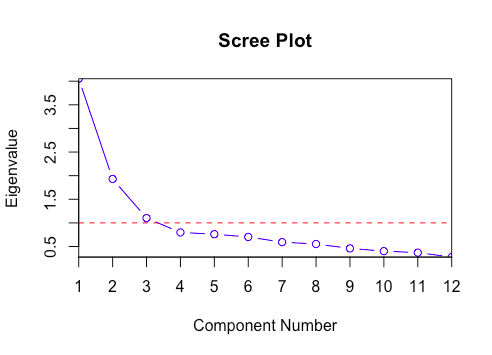

In [ ]:
!pip install factor_analyzer

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

### Cargando datos

Realicemos un análisis factorial en BFI (conjunto de datos basado en el proyecto de evaluación de la personalidad), que se recopilaron utilizando una escala de respuesta de 6 puntos: 1 Muy inexacto, 2 Moderadamente inexacto, 3 Ligeramente inexacto 4 Ligeramente exacto, 5 Moderadamente exacto y 6 Muy exacto. También puede descargar este conjunto de datos desde el siguiente enlace: https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Becas_Capital_Humano/Material/M05-Apredizaje_No_supervisado/data/UL10.csv")

In [ ]:
df

### Preprocesar Datos

In [ ]:
df.columns

### Eliminando columnas innecesarias

In [ ]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [ ]:
# Dropping missing values rows
df.dropna(inplace=True)

In [ ]:
df.info()

In [ ]:
df.head()

### Prueba de adecuación

Antes de realizar un análisis factorial, debe evaluar la "factorización" de nuestro conjunto de datos. Factorabilidad significa "¿podemos encontrar los factores en el conjunto de datos?". Hay dos métodos para verificar la factorización o la adecuación del muestreo:

  - Prueba de Bartlett
  - Prueba de Kaiser-Meyer-Olkin

La prueba de esfericidad de Bartlett verifica si las variables observadas se intercorrelacionan en absoluto utilizando la matriz de correlación observada contra la matriz de identidad. Si la prueba resultó ser estadísticamente insignificante, no debe emplear un análisis factorial.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

En esta prueba de Bartlett, el valor p es 0. La prueba fue estadísticamente significativa, lo que indica que la matriz de correlación observada no es una matriz de identidad.

La prueba de Kaiser-Meyer-Olkin (KMO) mide la idoneidad de los datos para el análisis factorial. Determina la adecuación para cada variable observada y para el modelo completo. KMO estima la proporción de varianza entre todas las variables observadas. Id de proporción inferior más adecuado para el análisis factorial. Los valores de KMO oscilan entre 0 y 1. El valor de KMO inferior a 0,6 se considera inadecuado.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [ ]:
kmo_model

El KMO general de nuestros datos es 0,84, lo cual es excelente. Este valor indica que puede continuar con su análisis factorial planificado.

## <font color='green'>Actividad 1</font>

Realice las siguientes pruebas al conjunto de datos.
  - Prueba de Bartlett
  - Prueba de Kaiser-Meyer-Olkin


In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
df_wine = pd.DataFrame(data = np.c_[data['data']],  #, data['target']
                     columns= data['feature_names']) # + ['target']
df_wine.head()

<font color='green'>Fin Actividad 1</font>


### Elegir el número de factores

Para elegir el número de factores, puede utilizar el criterio de Kaiser y el gráfico de Scree. Ambos se basan en valores propios.

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

Aquí, solo puede ver que los valores propios de 6 factores son mayores que uno. Significa que debemos elegir solo 6 factores (o variables no observadas).

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

El método del gráfico de pantalla dibuja una línea recta para cada factor y sus valores propios. Número de valores propios mayores que uno considerado como el número de factores.

Aquí, solo puede ver que los valores propios de 6 factores son mayores que uno. Significa que debemos elegir solo 6 factores (o variables no observadas).

## <font color='green'>Actividad 2</font>

Grafique el Scree plot y verifique cuantas son las variables no observadas que se deberian elegir.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
df_wine = pd.DataFrame(data = np.c_[data['data']],   #, data['target']
                     columns= data['feature_names']) # + ['target']
df_wine.head()

<font color='green'>Fin Actividad 2</font>

## Realizando Factor Analysis

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6)
fa.fit(df)

In [ ]:
datos=fa.fit_transform(df)

In [ ]:
len(datos)

In [ ]:
fa = FactorAnalyzer(n_factors=5)
datos=fa.fit_transform(df)

In [ ]:
datos

In [ ]:
fa.get_factor_variance()

Varianza total acumulada del 39% explicada por los 5 factores.

### Pros y contras del análisis factorial

El análisis factorial explora un gran conjunto de datos y encuentra asociaciones interrelacionadas. Reduce las variables observadas a unas pocas variables no observadas o identifica los grupos de variables interrelacionadas, que ayudan a los investigadores de mercado a comprimir las situaciones del mercado y encontrar la relación oculta entre el gusto, la preferencia y la influencia cultural del consumidor. Además, ayuda a mejorar el cuestionario para futuras encuestas. Los factores hacen que la interpretación de los datos sea más natural.

Los resultados del análisis factorial son controvertidos. Sus interpretaciones pueden ser discutibles porque se puede hacer más de una interpretación de los mismos factores de datos. Después de la identificación de factores y la denominación de factores se requiere conocimiento de dominio.

### Conclusión

En este notebook, ha aprendido qué es el análisis factorial. Los diferentes tipos de análisis factorial, cómo funciona el análisis factorial, terminología básica del análisis factorial, elección del número de factores, comparación del análisis de componentes principales y análisis factorial, implementación en python usando el paquete Python FactorAnalyzer, y pros y contras del análisis factorial.


## <font color='green'>Actividad 3</font>

Utilizando el conjunto de datos disponible, realice un Análisis Factorial y compare los resultados de 3 modelos de clasificación. Contraste los resultados obtenidos con las variables originales y las obtenidas con el AF. Reporte la medida F1 para cada clase y separe el conjunto de datos en 80% entrenamiento y 20% de prueba.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
df_wine = pd.DataFrame(data = np.c_[data['data']],   #, data['target']
                     columns= data['feature_names'])  #  + ['target']
df_wine.head()

<font color='green'>Fin Actividad 3</font>

<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Resumen**</font>

El Análisis de Factores (AF) es una técnica de reducción de dimensionalidad utilizada para encontrar patrones o estructuras subyacentes en un conjunto de variables observadas. Su objetivo principal es identificar factores latentes que expliquen la variabilidad observada en los datos.

Funcionamiento:

1. Identificación de factores: El AF busca factores latentes que expliquen la covarianza entre las variables observadas.

2. Extracción de factores: Utiliza técnicas matemáticas para extraer los factores latentes más importantes a partir de las variables observadas.

3. Rotación de factores: Los factores extraídos se pueden rotar para facilitar la interpretación y mejorar la simplicidad del modelo.

Ventajas de Análisis de Factores:

1. Reducción de dimensionalidad: AF permite reducir la dimensionalidad de los datos al resumir la información en un número menor de factores.

2. Identificación de patrones ocultos: El AF ayuda a identificar patrones o estructuras subyacentes en los datos que no son directamente observables.

3. Simplificación e interpretación: Los factores extraídos se pueden interpretar y dar sentido a las relaciones complejas entre las variables observadas.

Desventajas de Análisis de Factores:

1. Supuestos y limitaciones: El AF asume que las variables observadas están relacionadas linealmente con los factores latentes y que las observaciones están libres de errores.

2. Interpretación subjetiva: La interpretación de los factores extraídos puede ser subjetiva y requerir experiencia y conocimiento del dominio.

Ejemplos de aplicaciones de Análisis de Factores:

1. Psicometría: En psicología, el AF se utiliza para identificar constructos latentes como inteligencia emocional o actitudes.

2. Investigación de mercados: En estudios de mercado, el AF puede ayudar a identificar segmentos de clientes basados en sus preferencias.

3. Ciencias sociales: En ciencias sociales, el AF se aplica para identificar dimensiones subyacentes en datos de encuestas.

4. Investigación médica: En análisis de datos médicos, el AF se utiliza para identificar factores latentes relacionados con la salud o enfermedades.

En resumen, el Análisis de Factores es una técnica útil para encontrar patrones y estructuras subyacentes en datos observados, lo que permite reducir la dimensionalidad y facilitar la interpretación. Sin embargo, es importante tener en cuenta sus supuestos y limitaciones, y aplicarlo adecuadamente en función del problema y el contexto específico.